In [1]:
# Lireria clustering
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, cross_val_score

# Standard Scaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Libreria modelo predicción KNN
from sklearn.neighbors import KNeighborsClassifier

# Metricas
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Carga de datos

In [2]:
df_engagement = pd.read_csv("engagement.csv", index_col="Unnamed: 0")
df_engagement.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [3]:
df_engagement.shape

(7050, 12)

In [4]:
# Comprobamos si hay valores nulos en nuestro dataset
df_engagement.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

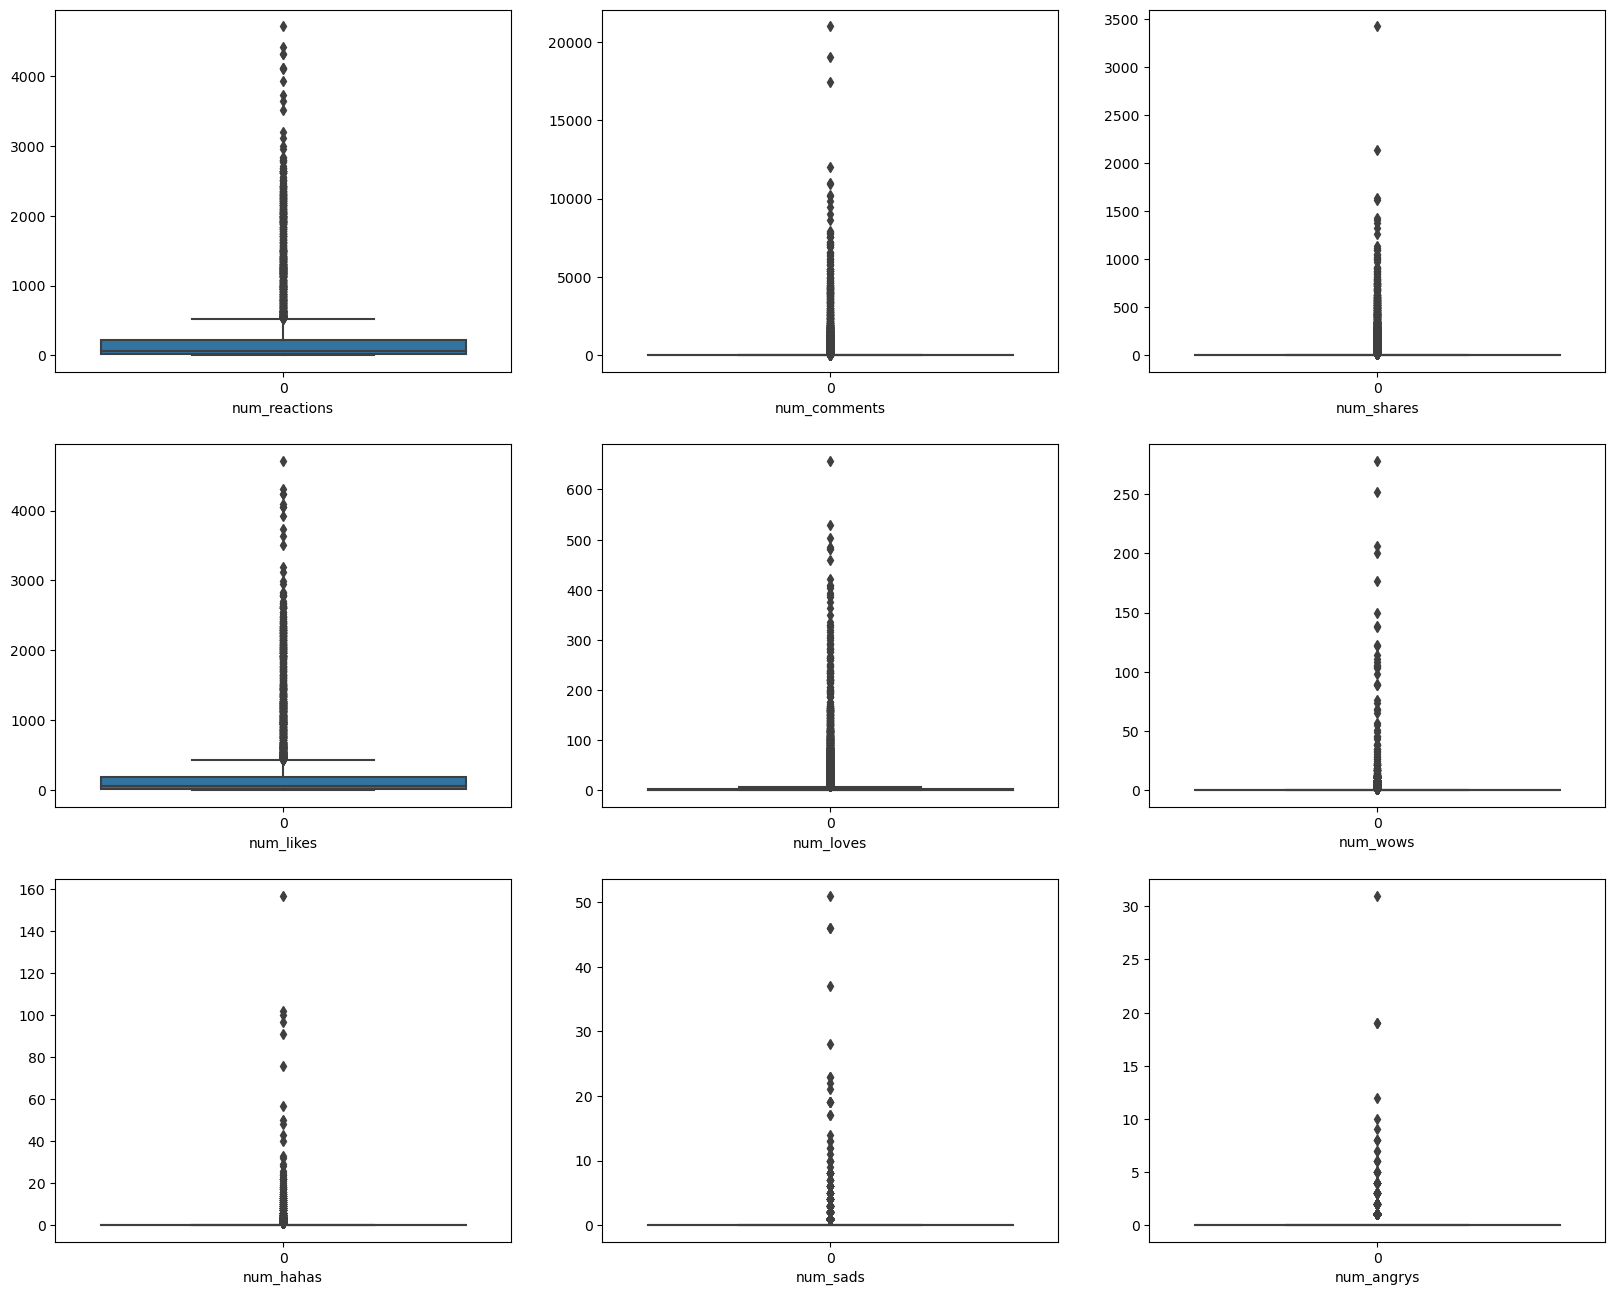

In [5]:
# Buscamos valores atípicos o erroneos. Para ello vamos a utiliar un bucle for que vaya dibujando un grafico para
# cada columna que indique reacciones a la publicacion.
fig = plt.figure(figsize=(20,16))

for n in range(3,12):
    plt.subplot(3,3,n-2)
    sns.boxplot(df_engagement.iloc[:,n])
    plt.xlabel(df_engagement.columns.tolist()[n])


In [6]:
# Voy a comprobar si hay alguna relaccion entre el valor más alto de numero de enfados con algun otro valor maximo de otra col
df_engagement[df_engagement["num_angrys"] == df_engagement["num_angrys"].max()]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
3313,134115277150304_206199379941893,photo,12/17/2017 8:16,215,44,0,176,1,3,4,0,31


In [7]:
# Voy a comprobar si hay alguna relaccion entre el valor más alto de numero de shares con algun otro valor maximo de otra col

df_engagement[df_engagement["num_shares"] == df_engagement["num_shares"].max()]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
4543,725980084255106_860707137449066,video,5/9/2018 8:33,1970,2903,3424,1330,482,138,13,5,2


Voy a eliminar los valores atípicos más altos para que no influyan en nuestro modelo predictivo pero considero que esas fotos/videos son interesantes de estudiar para saber que tipo de contenido es el que mejor o peor reacción provoca en las personas.

In [8]:
df_engagement.drop((df_engagement[df_engagement["num_reactions"] > 3000]).index.tolist(),axis=0, inplace=True)

df_engagement.drop((df_engagement[df_engagement["num_comments"] > 1000]).index.tolist(),axis=0, inplace=True)

df_engagement.drop((df_engagement[df_engagement["num_shares"] > 1000]).index.tolist(),axis=0, inplace=True)

df_engagement.drop((df_engagement[df_engagement["num_likes"] > 3000]).index.tolist(),axis=0, inplace=True)

df_engagement.drop((df_engagement[df_engagement["num_loves"] > 400]).index.tolist(),axis=0, inplace=True)

df_engagement.drop((df_engagement[df_engagement["num_wows"] > 150]).index.tolist(),axis=0, inplace=True)

df_engagement.drop((df_engagement[df_engagement["num_hahas"] > 60]).index.tolist(),axis=0, inplace=True)

df_engagement.drop((df_engagement[df_engagement["num_sads"] > 15]).index.tolist(),axis=0, inplace=True)

df_engagement.drop((df_engagement[df_engagement["num_angrys"] > 4]).index.tolist(),axis=0, inplace=True)

# 

In [9]:
# Eliminamos los valores iguales a 0 de las columnas 'num_reactions' y 'num_likes'
df_engagement.drop((df_engagement[df_engagement["num_reactions"] == 0]).index.tolist(), axis=0, inplace=True)
df_engagement.drop((df_engagement[df_engagement["num_likes"] == 0]).index.tolist(), axis=0, inplace=True)

En total hemos eliminado 600 registros de nuestro dataset.

In [10]:
# Tambien voy a eliminar las columnas 'num_sads' y 'num_angrys' por que tiene muy pocos registros.
df_engagement.drop(columns=["num_sads", "num_angrys"], axis=1, inplace=True)

In [11]:
# Eliminamos las columnas 'status_id' y 'status_published' por que no nos aportan información relevante.
df_engagement.drop(columns=["status_id", "status_published"], axis=1, inplace=True)

In [12]:
df_engagement

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas
0,video,529,512,262,432,92,3,1
1,photo,150,0,0,150,0,0,0
2,video,227,236,57,204,21,1,1
3,photo,111,0,0,111,0,0,0
4,photo,213,0,0,204,9,0,0
...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0
7046,photo,16,0,0,14,1,0,1
7047,photo,2,0,0,1,1,0,0
7048,photo,351,12,22,349,2,0,0


Convertimos la columna `status_type` a numerica utilizando la variable dummy. Es decir creamos dos columnas, en una se encuentra representada con un valor igual a 1 los registros que son de tipo video y en la otra columna los de tipo imagen.


In [13]:
status_type_dumm = pd.get_dummies(df_engagement["status_type"], prefix="status_type")
df_engagement.drop(columns=["status_type"], inplace=True)
df_engagement = df_engagement.join(status_type_dumm)

In [14]:
df_engagement

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,0,0,0,1
1,150,0,0,150,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,1
3,111,0,0,111,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,1,0,0
7047,2,0,0,1,1,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,1,0,0


# Division de datos

In [15]:
df_engagement_cluster, df_engagement_test = train_test_split(df_engagement, test_size=0.1, random_state=1)

# df_engagement_cluster se va a utilizar para crear los clusters.
# df_engagement_test es el conjunto de datos que dejo apartados para al final predecir sus clusters.

In [16]:
# Standard Scaler
sc = StandardScaler()
df_engagement_cluster_sc = sc.fit_transform(df_engagement_cluster)
df_engagement_test_sc = sc.fit_transform(df_engagement_test)

## Creacion del modelo de clustering

In [17]:
# Seleccion de la mejor K (numero de clusters)

inertias = []

for k in range(1,21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_engagement_cluster_sc)
    inertias.append(kmeans.inertia_)

C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ninel\anaconda3\lib\site-packages\sklearn\clust

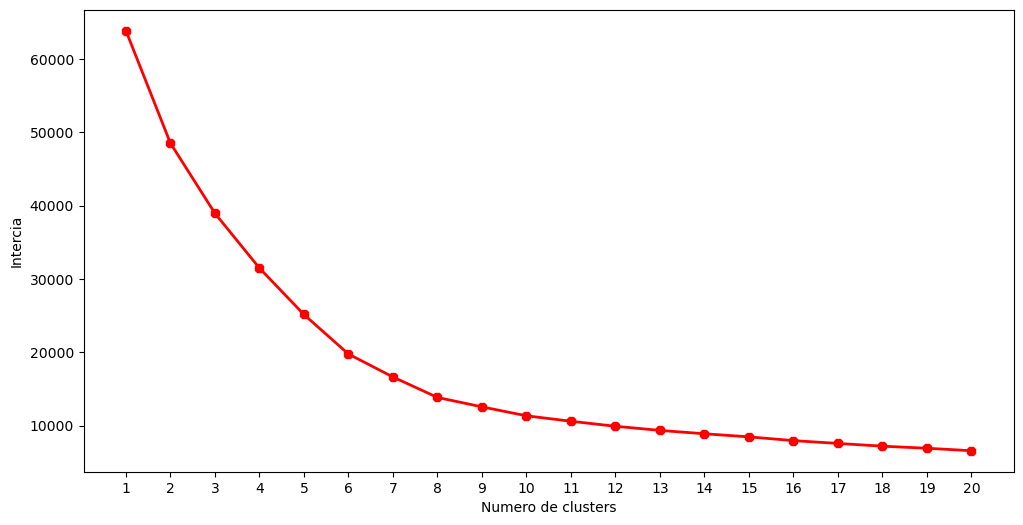

In [18]:
# Creamos un gráfico para mostrar las inertias que ha añadido el modelo a la lista anterior.
plt.figure(figsize=(12,6))
plt.plot(range(1,21), inertias, linewidth=2, color="red", marker="8")
plt.xlabel("Numero de clusters")
plt.xticks(range(1,21))
plt.ylabel("Intercia")

plt.show()

## Creacion del modelo

In [19]:
# Definimos la K (numero de clusters que va a crear nuestro modelo)
k = 8

km = KMeans(n_clusters=k)
clusters = km.fit_predict(df_engagement_cluster_sc)

df_engagement_cluster["cluster"] = clusters
df_engagement_cluster

C:\Users\ninel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,status_type_link,status_type_photo,status_type_status,status_type_video,cluster
3966,161,18,0,158,3,0,0,0,0,1,0,4
558,654,1,50,617,32,0,0,0,1,0,0,1
290,152,5,1,148,3,1,0,0,1,0,0,1
3097,12,0,1,12,0,0,0,0,1,0,0,1
3296,20,6,0,19,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
926,80,4,0,80,0,0,0,0,1,0,0,1
5533,8,1,0,8,0,0,0,0,1,0,0,1
4183,3,0,0,3,0,0,0,0,0,0,1,2
240,259,1,1,251,7,0,1,0,1,0,0,1


## Reducir dimensionalidad utilizando el modelo PCA

In [20]:
pca = PCA()
df_engagement_cluster_sc_pca = pca.fit_transform(df_engagement_cluster_sc)
df_engagement_test_sc1_pca = pca.transform(df_engagement_test_sc)

pca.explained_variance_ratio_

array([3.17987809e-01, 1.88061745e-01, 1.31163595e-01, 9.39708377e-02,
       9.03405013e-02, 7.11067119e-02, 6.82732998e-02, 2.13356101e-02,
       1.77597490e-02, 1.41520400e-07, 3.99294030e-33])

In [21]:
pca = PCA(n_components=4)
df_engagement_cluster_sc = pca.fit_transform(df_engagement_cluster_sc, clusters)
df_engagement_test_sc = pca.transform(df_engagement_test_sc)

Tras aplicar el modelo PCA a nuestro conjunto de datos, hemos obtenido el mejor resultado utiliazndo solo los 4 componentes que más afectan a nuestro modelo.
Tras esto, he aplicado la validación cruzada a un modelo KNN y he obtenido un 99& de precisión.

## Validacion cruzada

In [22]:
# Definimos la K (numero de vecinos a tener en cuenta)
k = 1
# Utilizamos k = 1 por que es lo que mejor resultado nos ha dado.

knn_model = KNeighborsClassifier(n_neighbors=k)

scores = cross_val_score(knn_model, df_engagement_cluster_sc, clusters, cv=10)
avg_score = np.mean(scores)

print(scores)
print(avg_score)

[0.99827883 0.98967298 1.         0.99655766 0.99655766 0.99655172
 1.         0.99482759 0.99655172 0.99827586]
0.9967274022197163


C:\Users\ninel\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


#### Nuestro modelo de predicción KNN tiene una precisión superior al 99%.

## Predicción de datos futuros

In [23]:
# Definimos la k()
k = 1
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(df_engagement_cluster_sc, clusters)

KNeighborsClassifier(n_neighbors=1)

In [24]:
y_pred = knn_model.predict(df_engagement_test_sc)

In [25]:
df_engagement_test["cluster"] = y_pred
df_engagement_test

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,status_type_link,status_type_photo,status_type_status,status_type_video,cluster
3629,113,7,0,112,0,1,0,0,1,0,0,1
392,132,3,0,123,5,4,0,0,1,0,0,1
3954,342,34,1,326,12,4,0,0,1,0,0,1
4586,364,2,0,361,2,1,0,0,0,1,0,4
3910,296,31,5,291,1,4,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5950,212,306,303,125,85,1,1,0,0,0,1,6
2953,11,1,0,11,0,0,0,0,1,0,0,1
4306,3,0,0,3,0,0,0,0,0,0,1,2
4443,166,336,147,145,18,2,1,0,0,0,1,6


In [27]:
xx = df_engagement[df_engagement["cluster"] == 1]
xx["status_type_photo"].value_counts()

KeyError: 'cluster'

Podemos observar que por ejemplo en el grupo numero 1 todas las publicaciones son de tipo foto.

In [ ]:
# Unimos los 2 dataframes, el que utilizamos para hacer el clustering y el que utilizamos para predecir los clusters.
df_engagement = pd.concat([df_engagement_cluster, df_engagement_test])

In [ ]:
fig = px.scatter_3d(df_engagement,
                    x="status_type_video",
                    y="num_hahas",
                    z="num_comments",
                    color="cluster")

fig.update_layout(autosize=False,
                 width=1000,
                 height=800)

fig.show()

In [ ]:
fig = px.scatter_3d(df_engagement,
                    x="num_reactions",
                    y="num_likes",
                    z="num_loves",
                    color="cluster")

fig.update_layout(autosize=False,
                 width=1000,
                 height=800)

fig.show()

En el gráfico superior podemos ver que hay una relación directa entre el numero de likes y el numero de reacciones. Es decir, que la mayoría de veces que una persona reacciona a una publicación es para dar like.

In [ ]:
fig = px.scatter_3d(df_engagement,
                    x="num_likes",
                    y="num_reactions",
                    z="num_comments",
                    color="cluster")

fig.update_layout(autosize=False,
                 width=1000,
                 height=800)

fig.show()

## Conclusiones

Nuesto modelo de clustering ha creado 7 grupos, y para crear esos grupos ha tenido en cuenta sobre todo el numero de reacciones, comentarios y shares de las publicaciones.
Por ejemplo, como mostré arriba, el cluster 1 está formado unicamente por imágenes.
En el gráfico superior podemos observar como el cluster 3 está formado en base a un numero alto de likes en las publicaciones, o el cluster numero 2 está formado por personas que comentan más que reaccionan a las publicaciones.

Después crear los clusters reducimos la dimensionalidad de nuestros datos utilizando un PCA (este modelo trata de buscar las variables que menos relacion tienen entre ellas) y después había empleado la validación cruzada para ver la precisión utilizando el KNN. Esto me dió una precisión casi del 100%.
Por útlimo, aplique el modelo KNN para realizar la predicción de los datos que no estaban agrupados por clusters y uní ambos dataframes en 1 solo.